In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px  
import os 

In [2]:
df = pd.read_csv('egypt_real_estate_listings.csv')

In [3]:
df

url       price  \
0      https://www.propertyfinder.eg/en/plp/buy/chale...   8,000,000   
1      https://www.propertyfinder.eg/en/plp/buy/villa...  25,000,000   
2      https://www.propertyfinder.eg/en/plp/buy/chale...  15,135,000   
3      https://www.propertyfinder.eg/en/plp/buy/apart...  12,652,000   
4      https://www.propertyfinder.eg/en/plp/buy/villa...  45,250,000   
...                                                  ...         ...   
19919  https://www.propertyfinder.eg/en/plp/buy/chale...  10,500,000   
19920  https://www.propertyfinder.eg/en/plp/buy/duple...  24,000,000   
19921  https://www.propertyfinder.eg/en/plp/buy/chale...   3,000,000   
19922  https://www.propertyfinder.eg/en/plp/buy/villa...   9,500,000   
19923  https://www.propertyfinder.eg/en/plp/buy/chale...   7,500,000   

                                             description  \
0      OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...   
1      For sale, a villa with immediate delivery in C...   
2      With a down payment of EGP 1,513,000, a fully ...   
3      Own an apartment in New Cairo with a minimal d...   
4      Project: Granville\nLocation: Fifth Settlement...   
...                                                  ...   
19919  Code: 2404\nChalet for sale in North Edge Towe...   
19920  Duplex for sale in Eastown -Sodic\n5th settlem...   
19921  Chalet for Sale in One of the Prime Projects o...   
19922  Villa for sale in installments in Sarai Compou...   
19923  Ground Chalet with Garden in Mountain View Nor...   

                                                location       type  \
0           Swan Lake Gouna, Al Gouna, Hurghada, Red Sea     Chalet   
1       Karmell, New Zayed City, Sheikh Zayed City, Giza      Villa   
2                  Azha North, Ras Al Hekma, North Coast     Chalet   
3      Taj City, 5th Settlement Compounds, The 5th Se...  Apartment   
4                     Granville, New Capital City, Cairo      Villa   
...                                                  ...        ...   
19919  North Edge Towers, New Alamein City, Al Alamei...     Chalet   
19920  Eastown, 5th Settlement Compounds, The 5th Set...     Duplex   
19921           White Sand, Markaz Al Hamam, North Coast     Chalet   
19922  Sarai, Mostakbal City Compounds, Mostakbal Cit...      Villa   
19923         Mountain View, Qesm Ad Dabaah, North Coast     Chalet   

                       size bedrooms bathrooms available_from payment_method  \
0         732 sqft / 68 sqm  1+ Maid         1    31 Aug 2025           Cash   
1      2,368 sqft / 220 sqm        4         4     2 Sep 2025           Cash   
2      1,270 sqft / 118 sqm        2         2    19 Aug 2025           Cash   
3      1,787 sqft / 166 sqm        3         2    26 Aug 2025   Installments   
4      4,306 sqft / 400 sqm        7         7     2 Sep 2025           Cash   
...                     ...      ...       ...            ...            ...   
19919  1,259 sqft / 117 sqm        2         2    21 Aug 2025           Cash   
19920  2,756 sqft / 256 sqm  3+ Maid         4     1 Sep 2025           Cash   
19921  1,195 sqft / 111 sqm        2         2    30 Jul 2025           Cash   
19922  2,573 sqft / 239 sqm        5         4    23 Aug 2025           Cash   
19923     990 sqft / 92 sqm        2         2    21 Aug 2025           Cash   

        down_payment  
0      1,200,000 EGP  
1      2,100,000 EGP  
2      1,513,000 EGP  
3      1,260,000 EGP  
4      2,262,500 EGP  
...              ...  
19919            NaN  
19920            NaN  
19921            NaN  
19922            NaN  
19923            NaN  

[19924 rows x 11 columns]

# data cleaning 

In [4]:
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment'],
      dtype='object')

In [5]:
df.drop(["url" , 'description'] , axis = 1 , inplace = True)
df

price                                           location  \
0       8,000,000       Swan Lake Gouna, Al Gouna, Hurghada, Red Sea   
1      25,000,000   Karmell, New Zayed City, Sheikh Zayed City, Giza   
2      15,135,000              Azha North, Ras Al Hekma, North Coast   
3      12,652,000  Taj City, 5th Settlement Compounds, The 5th Se...   
4      45,250,000                 Granville, New Capital City, Cairo   
...           ...                                                ...   
19919  10,500,000  North Edge Towers, New Alamein City, Al Alamei...   
19920  24,000,000  Eastown, 5th Settlement Compounds, The 5th Set...   
19921   3,000,000           White Sand, Markaz Al Hamam, North Coast   
19922   9,500,000  Sarai, Mostakbal City Compounds, Mostakbal Cit...   
19923   7,500,000         Mountain View, Qesm Ad Dabaah, North Coast   

            type                  size bedrooms bathrooms available_from  \
0         Chalet     732 sqft / 68 sqm  1+ Maid         1    31 Aug 2025   
1          Villa  2,368 sqft / 220 sqm        4         4     2 Sep 2025   
2         Chalet  1,270 sqft / 118 sqm        2         2    19 Aug 2025   
3      Apartment  1,787 sqft / 166 sqm        3         2    26 Aug 2025   
4          Villa  4,306 sqft / 400 sqm        7         7     2 Sep 2025   
...          ...                   ...      ...       ...            ...   
19919     Chalet  1,259 sqft / 117 sqm        2         2    21 Aug 2025   
19920     Duplex  2,756 sqft / 256 sqm  3+ Maid         4     1 Sep 2025   
19921     Chalet  1,195 sqft / 111 sqm        2         2    30 Jul 2025   
19922      Villa  2,573 sqft / 239 sqm        5         4    23 Aug 2025   
19923     Chalet     990 sqft / 92 sqm        2         2    21 Aug 2025   

      payment_method   down_payment  
0               Cash  1,200,000 EGP  
1               Cash  2,100,000 EGP  
2               Cash  1,513,000 EGP  
3       Installments  1,260,000 EGP  
4               Cash  2,262,500 EGP  
...              ...            ...  
19919           Cash            NaN  
19920           Cash            NaN  
19921           Cash            NaN  
19922           Cash            NaN  
19923           Cash            NaN  

[19924 rows x 9 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19924 entries, 0 to 19923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           19385 non-null  object
 1   location        19833 non-null  object
 2   type            19847 non-null  object
 3   size            19847 non-null  object
 4   bedrooms        19780 non-null  object
 5   bathrooms       19784 non-null  object
 6   available_from  19261 non-null  object
 7   payment_method  19383 non-null  object
 8   down_payment    5445 non-null   object
dtypes: object(9)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

price               539
location             91
type                 77
size                 77
bedrooms            144
bathrooms           140
available_from      663
payment_method      541
down_payment      14479
dtype: int64

In [8]:
round(df.isna().mean()*100,2)

price              2.71
location           0.46
type               0.39
size               0.39
bedrooms           0.72
bathrooms          0.70
available_from     3.33
payment_method     2.72
down_payment      72.67
dtype: float64

In [9]:
df.drop("down_payment" , axis=1 , inplace = True)

In [10]:
df = df.dropna(subset=['price','location', 'type', 'size', 'bedrooms','bathrooms','payment_method'])
df.reset_index(drop = True , inplace = True)

In [11]:
round(df.isna().mean()*100,2)

price             0.00
location          0.00
type              0.00
size              0.00
bedrooms          0.00
bathrooms         0.00
available_from    2.83
payment_method    0.00
dtype: float64

In [12]:
df

price                                           location  \
0       8,000,000       Swan Lake Gouna, Al Gouna, Hurghada, Red Sea   
1      25,000,000   Karmell, New Zayed City, Sheikh Zayed City, Giza   
2      15,135,000              Azha North, Ras Al Hekma, North Coast   
3      12,652,000  Taj City, 5th Settlement Compounds, The 5th Se...   
4      45,250,000                 Granville, New Capital City, Cairo   
...           ...                                                ...   
19315  10,500,000  North Edge Towers, New Alamein City, Al Alamei...   
19316  24,000,000  Eastown, 5th Settlement Compounds, The 5th Set...   
19317   3,000,000           White Sand, Markaz Al Hamam, North Coast   
19318   9,500,000  Sarai, Mostakbal City Compounds, Mostakbal Cit...   
19319   7,500,000         Mountain View, Qesm Ad Dabaah, North Coast   

            type                  size bedrooms bathrooms available_from  \
0         Chalet     732 sqft / 68 sqm  1+ Maid         1    31 Aug 2025   
1          Villa  2,368 sqft / 220 sqm        4         4     2 Sep 2025   
2         Chalet  1,270 sqft / 118 sqm        2         2    19 Aug 2025   
3      Apartment  1,787 sqft / 166 sqm        3         2    26 Aug 2025   
4          Villa  4,306 sqft / 400 sqm        7         7     2 Sep 2025   
...          ...                   ...      ...       ...            ...   
19315     Chalet  1,259 sqft / 117 sqm        2         2    21 Aug 2025   
19316     Duplex  2,756 sqft / 256 sqm  3+ Maid         4     1 Sep 2025   
19317     Chalet  1,195 sqft / 111 sqm        2         2    30 Jul 2025   
19318      Villa  2,573 sqft / 239 sqm        5         4    23 Aug 2025   
19319     Chalet     990 sqft / 92 sqm        2         2    21 Aug 2025   

      payment_method  
0               Cash  
1               Cash  
2               Cash  
3       Installments  
4               Cash  
...              ...  
19315           Cash  
19316           Cash  
19317           Cash  
19318           Cash  
19319           Cash  

[19320 rows x 8 columns]

In [13]:
df['price'] = df['price'].apply(lambda x : x.replace("," , "")  ).astype("int")

C:\Users\Dell\AppData\Local\Temp\ipykernel_22292\4084271798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(lambda x : x.replace("," , "")  ).astype("int")


In [14]:
df["price"]

0         8000000
1        25000000
2        15135000
3        12652000
4        45250000
           ...   
19315    10500000
19316    24000000
19317     3000000
19318     9500000
19319     7500000
Name: price, Length: 19320, dtype: int64

In [15]:
df["price"].dtype

dtype('int64')

In [16]:
 df['city']= df['location'].str.split(",").str[-2].str.strip()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22292\2522826468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city']= df['location'].str.split(",").str[-2].str.strip()


In [17]:
df['location'] = df['location'].str.split(",").str[-1].str.strip()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22292\1541985111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].str.split(",").str[-1].str.strip()


In [18]:
df["location"]

0            Red Sea
1               Giza
2        North Coast
3              Cairo
4              Cairo
            ...     
19315    North Coast
19316          Cairo
19317    North Coast
19318          Cairo
19319    North Coast
Name: location, Length: 19320, dtype: object

In [19]:
df["city"]

0                            Hurghada
1                   Sheikh Zayed City
2                        Ras Al Hekma
3                      New Cairo City
4                    New Capital City
                     ...             
19315                      Al Alamein
19316                  New Cairo City
19317                 Markaz Al Hamam
19318    Mostakbal City - Future City
19319                  Qesm Ad Dabaah
Name: city, Length: 19320, dtype: object

In [20]:
df["type"].value_counts()

type
Apartment          8280
Chalet             3967
Villa              3388
Townhouse          1270
Twin House          795
Duplex              612
Penthouse           560
iVilla              262
Hotel Apartment     102
Cabin                37
Palace               23
Whole Building       14
Roof                  6
Full Floor            4
Name: count, dtype: int64

In [21]:
df["size"]

0           732 sqft / 68 sqm
1        2,368 sqft / 220 sqm
2        1,270 sqft / 118 sqm
3        1,787 sqft / 166 sqm
4        4,306 sqft / 400 sqm
                 ...         
19315    1,259 sqft / 117 sqm
19316    2,756 sqft / 256 sqm
19317    1,195 sqft / 111 sqm
19318    2,573 sqft / 239 sqm
19319       990 sqft / 92 sqm
Name: size, Length: 19320, dtype: object

In [22]:
for i in df["size"].unique():
    print (i)
    print ("**************")

732 sqft / 68 sqm
**************
2,368 sqft / 220 sqm
**************
1,270 sqft / 118 sqm
**************
1,787 sqft / 166 sqm
**************
4,306 sqft / 400 sqm
**************
1,356 sqft / 126 sqm
**************
2,820 sqft / 262 sqm
**************
3,983 sqft / 370 sqm
**************
2,099 sqft / 195 sqm
**************
807 sqft / 75 sqm
**************
1,507 sqft / 140 sqm
**************
1,722 sqft / 160 sqm
**************
797 sqft / 74 sqm
**************
1,378 sqft / 128 sqm
**************
689 sqft / 64 sqm
**************
1,615 sqft / 150 sqm
**************
775 sqft / 72 sqm
**************
1,345 sqft / 125 sqm
**************
1,830 sqft / 170 sqm
**************
1,076 sqft / 100 sqm
**************
1,582 sqft / 147 sqm
**************
840 sqft / 78 sqm
**************
2,583 sqft / 240 sqm
**************
2,013 sqft / 187 sqm
**************
484 sqft / 45 sqm
**************
1,647 sqft / 153 sqm
**************
2,002 sqft / 186 sqm
**************
1,098 sqft / 102 sqm
**************
2,799 sqft / 

In [23]:
df[df["size"].isin (["170,195,636 sqft / 15,811,692 sqm" , '72,969 sqft / 6,779 sqm', '11 sqft / 1 sqm' ,'1,034,476 sqft / 96,106 sqm' ,
                    '32,292 sqft / 3,000 sqm' , '22 sqft / 2 sqm'])]

price     location            type  \
2691    39000000        Cairo           Villa   
4407    11692311        Cairo       Apartment   
8160     3500000   Alexandria       Apartment   
14034    1081500  North Coast          Chalet   
15163    6550000  North Coast          Chalet   
16713   50000000         Giza  Whole Building   
17947  100000000        Cairo           Villa   

                                    size  bedrooms bathrooms available_from  \
2691                     22 sqft / 2 sqm   5+ Maid         4     6 Aug 2025   
4407   170,195,636 sqft / 15,811,692 sqm         3         3     1 Sep 2025   
8160             72,969 sqft / 6,779 sqm         2         1     5 Aug 2025   
14034                    11 sqft / 1 sqm    studio         1    28 Aug 2025   
15163        1,034,476 sqft / 96,106 sqm         2         2     1 Sep 2025   
16713            32,292 sqft / 3,000 sqm        7+         7     1 Sep 2025   
17947            32,292 sqft / 3,000 sqm  7++ Maid        7+            NaN   

      payment_method                          city  
2691            Cash                      Madinaty  
4407            Cash  Mostakbal City - Future City  
8160            Cash                     Hay Sharq  
14034           Cash                    Al Alamein  
15163           Cash                  Ras Al Hekma  
16713           Cash                  Hay El Haram  
17947           Cash                New Cairo City

In [24]:
df = df[df["size"] != "170,195,636 sqft / 15,811,692 sqm"]
df = df[df["size"] != "72,969 sqft / 6,779 sqm"]
df = df[df["size"] != "11 sqft / 1 sqm"]
df = df[df["size"] != "1,034,476 sqft / 96,106 sqm"]
df = df[df["size"] != "22 sqft / 2 sqm"]
df.reset_index(drop = True , inplace = True)

In [25]:
for i in df["size"].unique():
    print (i)
    print ("**************")

732 sqft / 68 sqm
**************
2,368 sqft / 220 sqm
**************
1,270 sqft / 118 sqm
**************
1,787 sqft / 166 sqm
**************
4,306 sqft / 400 sqm
**************
1,356 sqft / 126 sqm
**************
2,820 sqft / 262 sqm
**************
3,983 sqft / 370 sqm
**************
2,099 sqft / 195 sqm
**************
807 sqft / 75 sqm
**************
1,507 sqft / 140 sqm
**************
1,722 sqft / 160 sqm
**************
797 sqft / 74 sqm
**************
1,378 sqft / 128 sqm
**************
689 sqft / 64 sqm
**************
1,615 sqft / 150 sqm
**************
775 sqft / 72 sqm
**************
1,345 sqft / 125 sqm
**************
1,830 sqft / 170 sqm
**************
1,076 sqft / 100 sqm
**************
1,582 sqft / 147 sqm
**************
840 sqft / 78 sqm
**************
2,583 sqft / 240 sqm
**************
2,013 sqft / 187 sqm
**************
484 sqft / 45 sqm
**************
1,647 sqft / 153 sqm
**************
2,002 sqft / 186 sqm
**************
1,098 sqft / 102 sqm
**************
2,799 sqft / 

In [26]:
df["size"].str.split("/").str[-2].str.split().str[0]

0          732
1        2,368
2        1,270
3        1,787
4        4,306
         ...  
19310    1,259
19311    2,756
19312    1,195
19313    2,573
19314      990
Name: size, Length: 19315, dtype: object

In [27]:
df["size_sqft"]= df["size"].str.split("/").str[-2].str.split().str[0]

In [28]:
df["size_sqft"]= df["size_sqft"].apply(lambda x : x.replace("," , "")).astype("int")

In [29]:
df["size"]= df["size"].str.split("/").str[-1].str.split().str[0]

In [30]:
df = df.rename(columns={"size": "size_sqm"})

In [31]:
df["size_sqm"] = df["size_sqm"].apply(lambda x : x.replace("," , "")).astype("int")

In [32]:
df["bedrooms"].unique()

array(['1+ Maid', '4', '2', '3', '7', '5+ Maid', '3+ Maid', '2+ Maid',
       '1', '4+ Maid', '7+ Maid', 'studio', '5', '6+ Maid',
       'studio+ Maid', '7++ Maid', '7+', '6'], dtype=object)

In [33]:
df["bedrooms"].value_counts()

bedrooms
3               4904
3+ Maid         3649
2               2833
4+ Maid         2020
2+ Maid         1722
4               1089
1                751
5+ Maid          714
1+ Maid          441
5                312
studio           279
6+ Maid          232
7+ Maid          120
6                 88
7++ Maid          58
studio+ Maid      48
7                 33
7+                22
Name: count, dtype: int64

In [34]:
def bedrooms (x) :
    if x== "3+ Maid":
        return 4
    elif x=="4+ Maid" :
        return 5 
    elif x== "2+ Maid":
        return 3
    elif x == "5+ Maid":
        return 6 
    elif x == "1+ Maid" or x== "studio+ Maid":
        return 2
    elif x == "6+ Maid":
        return 7
    elif (x == "7+ Maid") or (x== "7++ Maid") or (x== "7+"):
        return 8 
    elif x== "studio":
        return 1
    else :
        return int(x)


df["bedrooms"] = df["bedrooms"].apply(bedrooms)

In [35]:
df["bedrooms"].value_counts()

bedrooms
3    6626
4    4738
2    3322
5    2332
1    1030
6     802
7     265
8     200
Name: count, dtype: int64

In [36]:
df["bedrooms"].unique()

array([2, 4, 3, 7, 6, 1, 5, 8])

In [37]:
df["bathrooms"] = df["bathrooms"].apply(lambda x : x.replace(".0" , "").replace("7+" , "8"))

In [38]:
df= df[df["bathrooms"] != "none"]
df.reset_index(drop = True , inplace = True  )

In [39]:
df["bathrooms"]= df["bathrooms"].apply (lambda x:int(x))

In [40]:
df["bathrooms"].unique()

array([1, 4, 2, 7, 5, 3, 6, 8])

In [41]:
df["bathrooms"].value_counts()

bathrooms
3    6471
2    5511
4    3173
1    2106
5    1259
6     436
7     210
8     144
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19310 entries, 0 to 19309
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           19310 non-null  int64 
 1   location        19310 non-null  object
 2   type            19310 non-null  object
 3   size_sqm        19310 non-null  int64 
 4   bedrooms        19310 non-null  int64 
 5   bathrooms       19310 non-null  int64 
 6   available_from  18763 non-null  object
 7   payment_method  19310 non-null  object
 8   city            19310 non-null  object
 9   size_sqft       19310 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


In [43]:
df["available_from_month"] = df["available_from"].str.split().str[1]

In [44]:
df['available_from_month'].value_counts()

available_from_month
Aug    10220
Sep     6199
Jul     1349
Jun      408
May      355
Apr       81
Dec       42
Mar       28
Feb       24
Oct       19
Jan       19
Nov       19
Name: count, dtype: int64

In [45]:
df["available_from"] = df["available_from"].str.split().str[-1]

In [46]:
df["available_from"].value_counts()

available_from
2025    18483
2026      183
2024       91
2023        5
2027        1
Name: count, dtype: int64

In [47]:
df = df[df['available_from'] != "2027"]
df.reset_index(drop = True , inplace = True)

In [48]:
df["available_from"].value_counts()

available_from
2025    18483
2026      183
2024       91
2023        5
Name: count, dtype: int64

In [49]:
df["available_from"] = df["available_from"].astype("float")

In [50]:
df["available_from"].unique()

array([2025.,   nan, 2026., 2024., 2023.])

In [51]:
df["payment_method"].value_counts()

payment_method
Cash            15448
Installments     3861
Name: count, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 19309 non-null  int64  
 1   location              19309 non-null  object 
 2   type                  19309 non-null  object 
 3   size_sqm              19309 non-null  int64  
 4   bedrooms              19309 non-null  int64  
 5   bathrooms             19309 non-null  int64  
 6   available_from        18762 non-null  float64
 7   payment_method        19309 non-null  object 
 8   city                  19309 non-null  object 
 9   size_sqft             19309 non-null  int64  
 10  available_from_month  18762 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [53]:
df.reset_index(drop = True , inplace = True )
df

price     location       type  size_sqm  bedrooms  bathrooms  \
0       8000000      Red Sea     Chalet        68         2          1   
1      25000000         Giza      Villa       220         4          4   
2      15135000  North Coast     Chalet       118         2          2   
3      12652000        Cairo  Apartment       166         3          2   
4      45250000        Cairo      Villa       400         7          7   
...         ...          ...        ...       ...       ...        ...   
19304  10500000  North Coast     Chalet       117         2          2   
19305  24000000        Cairo     Duplex       256         4          4   
19306   3000000  North Coast     Chalet       111         2          2   
19307   9500000        Cairo      Villa       239         5          4   
19308   7500000  North Coast     Chalet        92         2          2   

       available_from payment_method                          city  size_sqft  \
0              2025.0           Cash                      Hurghada        732   
1              2025.0           Cash             Sheikh Zayed City       2368   
2              2025.0           Cash                  Ras Al Hekma       1270   
3              2025.0   Installments                New Cairo City       1787   
4              2025.0           Cash              New Capital City       4306   
...               ...            ...                           ...        ...   
19304          2025.0           Cash                    Al Alamein       1259   
19305          2025.0           Cash                New Cairo City       2756   
19306          2025.0           Cash               Markaz Al Hamam       1195   
19307          2025.0           Cash  Mostakbal City - Future City       2573   
19308          2025.0           Cash                Qesm Ad Dabaah        990   

      available_from_month  
0                      Aug  
1                      Sep  
2                      Aug  
3                      Aug  
4                      Sep  
...                    ...  
19304                  Aug  
19305                  Sep  
19306                  Jul  
19307                  Aug  
19308                  Aug  

[19309 rows x 11 columns]

In [54]:
df.select_dtypes(include= "number")

price  size_sqm  bedrooms  bathrooms  available_from  size_sqft
0       8000000        68         2          1          2025.0        732
1      25000000       220         4          4          2025.0       2368
2      15135000       118         2          2          2025.0       1270
3      12652000       166         3          2          2025.0       1787
4      45250000       400         7          7          2025.0       4306
...         ...       ...       ...        ...             ...        ...
19304  10500000       117         2          2          2025.0       1259
19305  24000000       256         4          4          2025.0       2756
19306   3000000       111         2          2          2025.0       1195
19307   9500000       239         5          4          2025.0       2573
19308   7500000        92         2          2          2025.0        990

[19309 rows x 6 columns]

In [55]:
df.select_dtypes(include= "object")

location       type payment_method                          city  \
0          Red Sea     Chalet           Cash                      Hurghada   
1             Giza      Villa           Cash             Sheikh Zayed City   
2      North Coast     Chalet           Cash                  Ras Al Hekma   
3            Cairo  Apartment   Installments                New Cairo City   
4            Cairo      Villa           Cash              New Capital City   
...            ...        ...            ...                           ...   
19304  North Coast     Chalet           Cash                    Al Alamein   
19305        Cairo     Duplex           Cash                New Cairo City   
19306  North Coast     Chalet           Cash               Markaz Al Hamam   
19307        Cairo      Villa           Cash  Mostakbal City - Future City   
19308  North Coast     Chalet           Cash                Qesm Ad Dabaah   

      available_from_month  
0                      Aug  
1                      Sep  
2                      Aug  
3                      Aug  
4                      Sep  
...                    ...  
19304                  Aug  
19305                  Sep  
19306                  Jul  
19307                  Aug  
19308                  Aug  

[19309 rows x 5 columns]

In [56]:
numeric_col = df.select_dtypes(include= "number").columns

In [57]:
catigorical_col = df.select_dtypes(include= "object").columns 

In [58]:
numeric_col

Index(['price', 'size_sqm', 'bedrooms', 'bathrooms', 'available_from',
       'size_sqft'],
      dtype='object')

In [59]:
catigorical_col 

Index(['location', 'type', 'payment_method', 'city', 'available_from_month'], dtype='object')

In [60]:
df.to_csv("cleaned_df.csv", index=False)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 19309 non-null  int64  
 1   location              19309 non-null  object 
 2   type                  19309 non-null  object 
 3   size_sqm              19309 non-null  int64  
 4   bedrooms              19309 non-null  int64  
 5   bathrooms             19309 non-null  int64  
 6   available_from        18762 non-null  float64
 7   payment_method        19309 non-null  object 
 8   city                  19309 non-null  object 
 9   size_sqft             19309 non-null  int64  
 10  available_from_month  18762 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [62]:
df.isna().sum()

price                     0
location                  0
type                      0
size_sqm                  0
bedrooms                  0
bathrooms                 0
available_from          547
payment_method            0
city                      0
size_sqft                 0
available_from_month    547
dtype: int64

## Check Outliers

In [63]:
for col in numeric_col:
    fig = px.box(df, y=col, points="suspectedoutliers", title=f"Box plot of {col}")
    fig.show()

In [64]:
df.describe (include = "number")

price      size_sqm      bedrooms     bathrooms  available_from  \
count  1.930900e+04  19309.000000  19309.000000  19309.000000    18762.000000   
mean   1.641506e+07    209.694650      3.439847      2.939821     2025.004371   
std    2.358871e+07    165.256735      1.331274      1.306429        0.125107   
min    1.869000e+05     20.000000      1.000000      1.000000     2023.000000   
25%    6.000000e+06    126.000000      3.000000      2.000000     2025.000000   
50%    1.040000e+07    170.000000      3.000000      3.000000     2025.000000   
75%    1.820000e+07    237.000000      4.000000      4.000000     2025.000000   
max    8.400000e+08   3800.000000      8.000000      8.000000     2026.000000   

          size_sqft  
count  19309.000000  
mean    2257.142576  
std     1778.813660  
min      215.000000  
25%     1356.000000  
50%     1830.000000  
75%     2551.000000  
max    40903.000000

In [65]:
df.describe(include = "O")

location       type payment_method            city available_from_month
count     19309      19309          19309           19309                18762
unique       16         14              2              69                   12
top       Cairo  Apartment           Cash  New Cairo City                  Aug
freq       7432       8275          15448            5117                10220

# data preprocessing 

### 1 - split data into target and feature 

In [66]:
x= df.drop("price" , axis = 1 ) 

y = df["price"]

In [67]:
y

0         8000000
1        25000000
2        15135000
3        12652000
4        45250000
           ...   
19304    10500000
19305    24000000
19306     3000000
19307     9500000
19308     7500000
Name: price, Length: 19309, dtype: int64

### 2- split data into train and test 

In [68]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= 0.2 , random_state= 42 )


x_train.reset_index(drop = True , inplace = True ) 
x_test.reset_index(drop = True , inplace = True ) 
y_train.reset_index(drop = True , inplace = True ) 
y_test.reset_index(drop = True , inplace = True )

### 3- numeric handling  

##### 3.1 - impute missing value 

In [69]:
round(df.select_dtypes (include = "number").isna().mean()*100,2)

price             0.00
size_sqm          0.00
bedrooms          0.00
bathrooms         0.00
available_from    2.83
size_sqft         0.00
dtype: float64

In [70]:
from sklearn.impute import KNNImputer 
knn_imputer = KNNImputer(n_neighbors= 5 )
x_train [['available_from']] = knn_imputer.fit_transform (x_train [['available_from']])
x_test [['available_from']] = knn_imputer.transform (x_test [['available_from']])

In [71]:
round(x_train.isna().mean()*100,2)

location                0.00
type                    0.00
size_sqm                0.00
bedrooms                0.00
bathrooms               0.00
available_from          0.00
payment_method          0.00
city                    0.00
size_sqft               0.00
available_from_month    2.82
dtype: float64

In [72]:
round(x_test.isna().mean()*100,2)

location                0.00
type                    0.00
size_sqm                0.00
bedrooms                0.00
bathrooms               0.00
available_from          0.00
payment_method          0.00
city                    0.00
size_sqft               0.00
available_from_month    2.87
dtype: float64

##### 3.2 - Scaling    

In [73]:
from sklearn.preprocessing import RobustScaler

numeric_col = x_train.select_dtypes (include = "number").columns 

robust_scaler = RobustScaler()
x_train [numeric_col] = robust_scaler.fit_transform (x_train [numeric_col])
x_test [numeric_col] = robust_scaler.transform (x_test [numeric_col])

In [74]:
x_train

location       type  size_sqm  bedrooms  bathrooms  available_from  \
0            Cairo  Apartment  0.267857       1.0        0.0        0.000000   
1            Cairo      Villa  7.928571       4.0        1.5        0.000000   
2      North Coast      Villa  4.482143       5.0        2.0        0.003997   
3            Cairo  Apartment -0.321429       0.0       -0.5        0.000000   
4            Cairo  Apartment -0.080357       0.0        0.0        0.000000   
...            ...        ...       ...       ...        ...             ...   
15442  North Coast     Chalet  0.491071       1.0        0.0        0.000000   
15443        Cairo  Apartment -0.089286      -1.0        0.0        0.000000   
15444         Giza  Apartment -0.357143       0.0       -0.5        0.000000   
15445         Giza  Apartment -0.357143      -1.0       -0.5        0.000000   
15446     Qalyubia  Apartment  0.357143       1.0        0.0        0.000000   

      payment_method               city  size_sqft available_from_month  
0               Cash     New Cairo City   0.267828                  Sep  
1               Cash     New Cairo City   7.925373                  Jul  
2               Cash         Al Alamein   4.480100                  NaN  
3               Cash     New Cairo City  -0.321725                  Jun  
4               Cash     New Cairo City  -0.080431                  Aug  
...              ...                ...        ...                  ...  
15442           Cash     Qesm Ad Dabaah   0.490879                  Jul  
15443           Cash     New Cairo City  -0.089552                  Aug  
15444   Installments     6 October City  -0.357380                  Sep  
15445           Cash  Sheikh Zayed City  -0.357380                  Aug  
15446           Cash         Obour City   0.356551                  May  

[15447 rows x 10 columns]

In [75]:
x_test

location        type  size_sqm  bedrooms  bathrooms  available_from  \
0           Cairo   Townhouse  1.223214       2.0        0.5             0.0   
1           Cairo   Apartment  0.223214       0.0        0.5             0.0   
2     North Coast      Chalet  0.491071       2.0        0.5             0.0   
3           Cairo   Apartment  0.008929       0.0        0.0             0.0   
4     North Coast      Chalet -0.482143       0.0        0.0             0.0   
...           ...         ...       ...       ...        ...             ...   
3857         Giza   Apartment  0.000000       1.0        0.0             0.0   
3858         Giza   Apartment -0.803571      -1.0       -1.0             0.0   
3859  North Coast      Chalet -0.446429      -1.0       -0.5             0.0   
3860      Red Sea   Townhouse  0.491071      -2.0       -0.5             0.0   
3861        Cairo  Twin House  0.982143       2.0        1.0             0.0   

     payment_method                          city  size_sqft  \
0              Cash                New Cairo City   1.223051   
1              Cash  Mostakbal City - Future City   0.223051   
2      Installments                Qesm Ad Dabaah   0.490879   
3              Cash                New Cairo City   0.009121   
4              Cash                Qesm Ad Dabaah  -0.481758   
...             ...                           ...        ...   
3857   Installments                6 October City   0.000000   
3858           Cash                6 October City  -0.803483   
3859           Cash                  Ras Al Hekma  -0.446103   
3860   Installments                      Hurghada   0.490879   
3861           Cash              New Capital City   0.981758   

     available_from_month  
0                     May  
1                     Aug  
2                     Sep  
3                     Aug  
4                     Aug  
...                   ...  
3857                  Sep  
3858                  Aug  
3859                  Aug  
3860                  Sep  
3861                  Sep  

[3862 rows x 10 columns]

### 4 - catigorical handling 

##### Imputing missing _value 

In [76]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'most_frequent')

x_train[['available_from_month']] = imputer.fit_transform(x_train[['available_from_month']])

x_test[['available_from_month']] = imputer.transform(x_test[['available_from_month']])

In [77]:
x_train

location       type  size_sqm  bedrooms  bathrooms  available_from  \
0            Cairo  Apartment  0.267857       1.0        0.0        0.000000   
1            Cairo      Villa  7.928571       4.0        1.5        0.000000   
2      North Coast      Villa  4.482143       5.0        2.0        0.003997   
3            Cairo  Apartment -0.321429       0.0       -0.5        0.000000   
4            Cairo  Apartment -0.080357       0.0        0.0        0.000000   
...            ...        ...       ...       ...        ...             ...   
15442  North Coast     Chalet  0.491071       1.0        0.0        0.000000   
15443        Cairo  Apartment -0.089286      -1.0        0.0        0.000000   
15444         Giza  Apartment -0.357143       0.0       -0.5        0.000000   
15445         Giza  Apartment -0.357143      -1.0       -0.5        0.000000   
15446     Qalyubia  Apartment  0.357143       1.0        0.0        0.000000   

      payment_method               city  size_sqft available_from_month  
0               Cash     New Cairo City   0.267828                  Sep  
1               Cash     New Cairo City   7.925373                  Jul  
2               Cash         Al Alamein   4.480100                  Aug  
3               Cash     New Cairo City  -0.321725                  Jun  
4               Cash     New Cairo City  -0.080431                  Aug  
...              ...                ...        ...                  ...  
15442           Cash     Qesm Ad Dabaah   0.490879                  Jul  
15443           Cash     New Cairo City  -0.089552                  Aug  
15444   Installments     6 October City  -0.357380                  Sep  
15445           Cash  Sheikh Zayed City  -0.357380                  Aug  
15446           Cash         Obour City   0.356551                  May  

[15447 rows x 10 columns]

In [78]:
x_train.isna().sum()

location                0
type                    0
size_sqm                0
bedrooms                0
bathrooms               0
available_from          0
payment_method          0
city                    0
size_sqft               0
available_from_month    0
dtype: int64

In [79]:
x_test

location        type  size_sqm  bedrooms  bathrooms  available_from  \
0           Cairo   Townhouse  1.223214       2.0        0.5             0.0   
1           Cairo   Apartment  0.223214       0.0        0.5             0.0   
2     North Coast      Chalet  0.491071       2.0        0.5             0.0   
3           Cairo   Apartment  0.008929       0.0        0.0             0.0   
4     North Coast      Chalet -0.482143       0.0        0.0             0.0   
...           ...         ...       ...       ...        ...             ...   
3857         Giza   Apartment  0.000000       1.0        0.0             0.0   
3858         Giza   Apartment -0.803571      -1.0       -1.0             0.0   
3859  North Coast      Chalet -0.446429      -1.0       -0.5             0.0   
3860      Red Sea   Townhouse  0.491071      -2.0       -0.5             0.0   
3861        Cairo  Twin House  0.982143       2.0        1.0             0.0   

     payment_method                          city  size_sqft  \
0              Cash                New Cairo City   1.223051   
1              Cash  Mostakbal City - Future City   0.223051   
2      Installments                Qesm Ad Dabaah   0.490879   
3              Cash                New Cairo City   0.009121   
4              Cash                Qesm Ad Dabaah  -0.481758   
...             ...                           ...        ...   
3857   Installments                6 October City   0.000000   
3858           Cash                6 October City  -0.803483   
3859           Cash                  Ras Al Hekma  -0.446103   
3860   Installments                      Hurghada   0.490879   
3861           Cash              New Capital City   0.981758   

     available_from_month  
0                     May  
1                     Aug  
2                     Sep  
3                     Aug  
4                     Aug  
...                   ...  
3857                  Sep  
3858                  Aug  
3859                  Aug  
3860                  Sep  
3861                  Sep  

[3862 rows x 10 columns]

In [80]:
x_test.isna().sum()

location                0
type                    0
size_sqm                0
bedrooms                0
bathrooms               0
available_from          0
payment_method          0
city                    0
size_sqft               0
available_from_month    0
dtype: int64

##### Encoding 

1- One Hot Encoder  Encoder 

In [81]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(drop = "first" , sparse_output= False  , handle_unknown = "ignore") 
new_x_train= ohe.fit_transform (x_train[["payment_method"]])
new_x_test= ohe.transform (x_test[["payment_method"]])

In [82]:
ohe_train_df = pd.DataFrame(new_x_train ,columns = ohe.get_feature_names_out(["payment_method"]))

In [83]:
ohe_train_df

payment_method_Installments
0                              0.0
1                              0.0
2                              0.0
3                              0.0
4                              0.0
...                            ...
15442                          0.0
15443                          0.0
15444                          1.0
15445                          0.0
15446                          0.0

[15447 rows x 1 columns]

In [84]:
ohe_test_df = pd.DataFrame(new_x_test ,columns = ohe.get_feature_names_out(["payment_method"]))

In [85]:
ohe_test_df

payment_method_Installments
0                             0.0
1                             0.0
2                             1.0
3                             0.0
4                             0.0
...                           ...
3857                          1.0
3858                          0.0
3859                          0.0
3860                          1.0
3861                          0.0

[3862 rows x 1 columns]

2- Binary Encoder 

In [86]:
from category_encoders import BinaryEncoder


be = BinaryEncoder()

be_train = be.fit_transform(x_train[['city' , 'location','available_from_month']])
be_test = be.transform(x_test[['city' , 'location',"available_from_month"]])


In [87]:
be_train

city_0  city_1  city_2  city_3  city_4  city_5  city_6  location_0  \
0           0       0       0       0       0       0       1           0   
1           0       0       0       0       0       0       1           0   
2           0       0       0       0       0       1       0           0   
3           0       0       0       0       0       0       1           0   
4           0       0       0       0       0       0       1           0   
...       ...     ...     ...     ...     ...     ...     ...         ...   
15442       0       0       0       1       1       1       1           0   
15443       0       0       0       0       0       0       1           0   
15444       0       0       0       0       1       0       0           0   
15445       0       0       0       0       1       1       1           0   
15446       0       0       1       1       1       0       0           0   

       location_1  location_2  location_3  available_from_month_0  \
0               0           0           1                       0   
1               0           0           1                       0   
2               0           1           0                       0   
3               0           0           1                       0   
4               0           0           1                       0   
...           ...         ...         ...                     ...   
15442           0           1           0                       0   
15443           0           0           1                       0   
15444           1           0           0                       0   
15445           1           0           0                       0   
15446           1           1           1                       0   

       available_from_month_1  available_from_month_2  available_from_month_3  
0                           0                       0                       1  
1                           0                       1                       0  
2                           0                       1                       1  
3                           1                       0                       0  
4                           0                       1                       1  
...                       ...                     ...                     ...  
15442                       0                       1                       0  
15443                       0                       1                       1  
15444                       0                       0                       1  
15445                       0                       1                       1  
15446                       1                       1                       1  

[15447 rows x 15 columns]

In [88]:
be_test

city_0  city_1  city_2  city_3  city_4  city_5  city_6  location_0  \
0          0       0       0       0       0       0       1           0   
1          0       0       1       0       0       0       0           0   
2          0       0       0       1       1       1       1           0   
3          0       0       0       0       0       0       1           0   
4          0       0       0       1       1       1       1           0   
...      ...     ...     ...     ...     ...     ...     ...         ...   
3857       0       0       0       0       1       0       0           0   
3858       0       0       0       0       1       0       0           0   
3859       0       0       0       0       1       1       0           0   
3860       0       0       0       0       0       1       1           0   
3861       0       0       0       1       0       1       0           0   

      location_1  location_2  location_3  available_from_month_0  \
0              0           0           1                       0   
1              0           0           1                       0   
2              0           1           0                       0   
3              0           0           1                       0   
4              0           1           0                       0   
...          ...         ...         ...                     ...   
3857           1           0           0                       0   
3858           1           0           0                       0   
3859           0           1           0                       0   
3860           0           1           1                       0   
3861           0           0           1                       0   

      available_from_month_1  available_from_month_2  available_from_month_3  
0                          1                       1                       1  
1                          0                       1                       1  
2                          0                       0                       1  
3                          0                       1                       1  
4                          0                       1                       1  
...                      ...                     ...                     ...  
3857                       0                       0                       1  
3858                       0                       1                       1  
3859                       0                       1                       1  
3860                       0                       0                       1  
3861                       0                       0                       1  

[3862 rows x 15 columns]

3 - ordinal encoder

In [89]:
df["type"].unique()

array(['Chalet', 'Villa', 'Apartment', 'Penthouse', 'Twin House',
       'Duplex', 'iVilla', 'Townhouse', 'Hotel Apartment', 'Cabin',
       'Palace', 'Whole Building', 'Full Floor', 'Roof'], dtype=object)

In [90]:
ordered_list = [
    'Cabin',
    'Chalet',
    'Apartment',
    'Full Floor',
    'Hotel Apartment',
    'Twin House',
    'Duplex',
    'iVilla',
    'Villa',
    'Penthouse',
    'Townhouse',
    'Roof',
    'Whole Building',
    'Palace'
]

In [91]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories= [ordered_list])

x_train[['type']] = ordinal.fit_transform(x_train[['type']])

x_test[['type']] = ordinal.transform(x_test[['type']])

In [92]:
x_train.drop(["city" ,"location" , "payment_method","available_from_month"] , axis = 1 , inplace = True)
x_test.drop(["city" ,"location" , "payment_method","available_from_month"] , axis = 1 , inplace = True)

In [93]:
x_train = pd.concat([x_train , ohe_train_df , be_train] , axis=1)

In [94]:
x_train

type  size_sqm  bedrooms  bathrooms  available_from  size_sqft  \
0       2.0  0.267857       1.0        0.0        0.000000   0.267828   
1       8.0  7.928571       4.0        1.5        0.000000   7.925373   
2       8.0  4.482143       5.0        2.0        0.003997   4.480100   
3       2.0 -0.321429       0.0       -0.5        0.000000  -0.321725   
4       2.0 -0.080357       0.0        0.0        0.000000  -0.080431   
...     ...       ...       ...        ...             ...        ...   
15442   1.0  0.491071       1.0        0.0        0.000000   0.490879   
15443   2.0 -0.089286      -1.0        0.0        0.000000  -0.089552   
15444   2.0 -0.357143       0.0       -0.5        0.000000  -0.357380   
15445   2.0 -0.357143      -1.0       -0.5        0.000000  -0.357380   
15446   2.0  0.357143       1.0        0.0        0.000000   0.356551   

       payment_method_Installments  city_0  city_1  city_2  ...  city_5  \
0                              0.0       0       0       0  ...       0   
1                              0.0       0       0       0  ...       0   
2                              0.0       0       0       0  ...       1   
3                              0.0       0       0       0  ...       0   
4                              0.0       0       0       0  ...       0   
...                            ...     ...     ...     ...  ...     ...   
15442                          0.0       0       0       0  ...       1   
15443                          0.0       0       0       0  ...       0   
15444                          1.0       0       0       0  ...       0   
15445                          0.0       0       0       0  ...       1   
15446                          0.0       0       0       1  ...       0   

       city_6  location_0  location_1  location_2  location_3  \
0           1           0           0           0           1   
1           1           0           0           0           1   
2           0           0           0           1           0   
3           1           0           0           0           1   
4           1           0           0           0           1   
...       ...         ...         ...         ...         ...   
15442       1           0           0           1           0   
15443       1           0           0           0           1   
15444       0           0           1           0           0   
15445       1           0           1           0           0   
15446       0           0           1           1           1   

       available_from_month_0  available_from_month_1  available_from_month_2  \
0                           0                       0                       0   
1                           0                       0                       1   
2                           0                       0                       1   
3                           0                       1                       0   
4                           0                       0                       1   
...                       ...                     ...                     ...   
15442                       0                       0                       1   
15443                       0                       0                       1   
15444                       0                       0                       0   
15445                       0                       0                       1   
15446                       0                       1                       1   

       available_from_month_3  
0                           1  
1                           0  
2                           1  
3                           0  
4                           1  
...                       ...  
15442                       0  
15443                       1  
15444                       1  
15445                       1  
15446                       1  

[15447 rows x 22 columns]

In [95]:
x_test = pd.concat([x_test , ohe_test_df , be_test] , axis=1)

In [96]:
x_test

type  size_sqm  bedrooms  bathrooms  available_from  size_sqft  \
0     10.0  1.223214       2.0        0.5             0.0   1.223051   
1      2.0  0.223214       0.0        0.5             0.0   0.223051   
2      1.0  0.491071       2.0        0.5             0.0   0.490879   
3      2.0  0.008929       0.0        0.0             0.0   0.009121   
4      1.0 -0.482143       0.0        0.0             0.0  -0.481758   
...    ...       ...       ...        ...             ...        ...   
3857   2.0  0.000000       1.0        0.0             0.0   0.000000   
3858   2.0 -0.803571      -1.0       -1.0             0.0  -0.803483   
3859   1.0 -0.446429      -1.0       -0.5             0.0  -0.446103   
3860  10.0  0.491071      -2.0       -0.5             0.0   0.490879   
3861   5.0  0.982143       2.0        1.0             0.0   0.981758   

      payment_method_Installments  city_0  city_1  city_2  ...  city_5  \
0                             0.0       0       0       0  ...       0   
1                             0.0       0       0       1  ...       0   
2                             1.0       0       0       0  ...       1   
3                             0.0       0       0       0  ...       0   
4                             0.0       0       0       0  ...       1   
...                           ...     ...     ...     ...  ...     ...   
3857                          1.0       0       0       0  ...       0   
3858                          0.0       0       0       0  ...       0   
3859                          0.0       0       0       0  ...       1   
3860                          1.0       0       0       0  ...       1   
3861                          0.0       0       0       0  ...       1   

      city_6  location_0  location_1  location_2  location_3  \
0          1           0           0           0           1   
1          0           0           0           0           1   
2          1           0           0           1           0   
3          1           0           0           0           1   
4          1           0           0           1           0   
...      ...         ...         ...         ...         ...   
3857       0           0           1           0           0   
3858       0           0           1           0           0   
3859       0           0           0           1           0   
3860       1           0           0           1           1   
3861       0           0           0           0           1   

      available_from_month_0  available_from_month_1  available_from_month_2  \
0                          0                       1                       1   
1                          0                       0                       1   
2                          0                       0                       0   
3                          0                       0                       1   
4                          0                       0                       1   
...                      ...                     ...                     ...   
3857                       0                       0                       0   
3858                       0                       0                       1   
3859                       0                       0                       1   
3860                       0                       0                       0   
3861                       0                       0                       0   

      available_from_month_3  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
...                      ...  
3857                       1  
3858                       1  
3859                       1  
3860                       1  
3861                       1  

[3862 rows x 22 columns]

In [97]:
x_train.isna().sum()

type                           0
size_sqm                       0
bedrooms                       0
bathrooms                      0
available_from                 0
size_sqft                      0
payment_method_Installments    0
city_0                         0
city_1                         0
city_2                         0
city_3                         0
city_4                         0
city_5                         0
city_6                         0
location_0                     0
location_1                     0
location_2                     0
location_3                     0
available_from_month_0         0
available_from_month_1         0
available_from_month_2         0
available_from_month_3         0
dtype: int64

In [98]:
x_test.isna().sum()

type                           0
size_sqm                       0
bedrooms                       0
bathrooms                      0
available_from                 0
size_sqft                      0
payment_method_Installments    0
city_0                         0
city_1                         0
city_2                         0
city_3                         0
city_4                         0
city_5                         0
city_6                         0
location_0                     0
location_1                     0
location_2                     0
location_3                     0
available_from_month_0         0
available_from_month_1         0
available_from_month_2         0
available_from_month_3         0
dtype: int64

In [99]:
x_train.select_dtypes(include="number").columns

Index(['type', 'size_sqm', 'bedrooms', 'bathrooms', 'available_from',
       'size_sqft', 'payment_method_Installments', 'city_0', 'city_1',
       'city_2', 'city_3', 'city_4', 'city_5', 'city_6', 'location_0',
       'location_1', 'location_2', 'location_3', 'available_from_month_0',
       'available_from_month_1', 'available_from_month_2',
       'available_from_month_3'],
      dtype='object')

In [100]:
x_train.select_dtypes(include="O").columns

Index([], dtype='object')

In [101]:
x_test.select_dtypes(include="number").columns

Index(['type', 'size_sqm', 'bedrooms', 'bathrooms', 'available_from',
       'size_sqft', 'payment_method_Installments', 'city_0', 'city_1',
       'city_2', 'city_3', 'city_4', 'city_5', 'city_6', 'location_0',
       'location_1', 'location_2', 'location_3', 'available_from_month_0',
       'available_from_month_1', 'available_from_month_2',
       'available_from_month_3'],
      dtype='object')

In [102]:
x_test.select_dtypes(include="O").columns

Index([], dtype='object')

# Bivariate Analysis

#### Distribution for price 

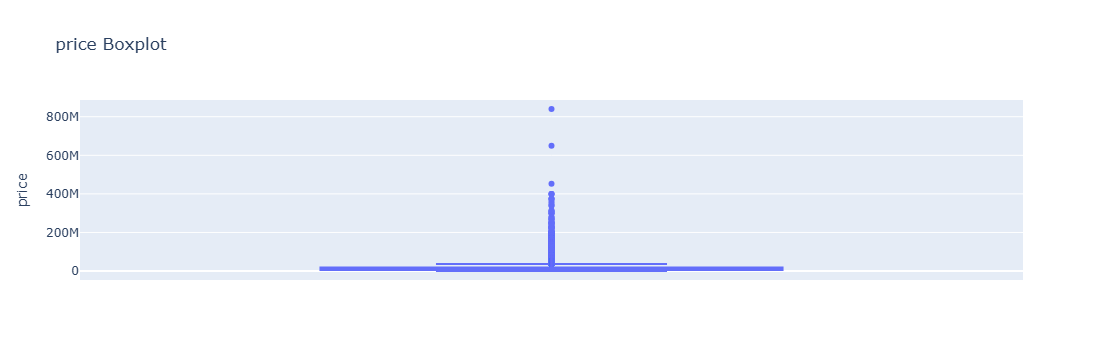

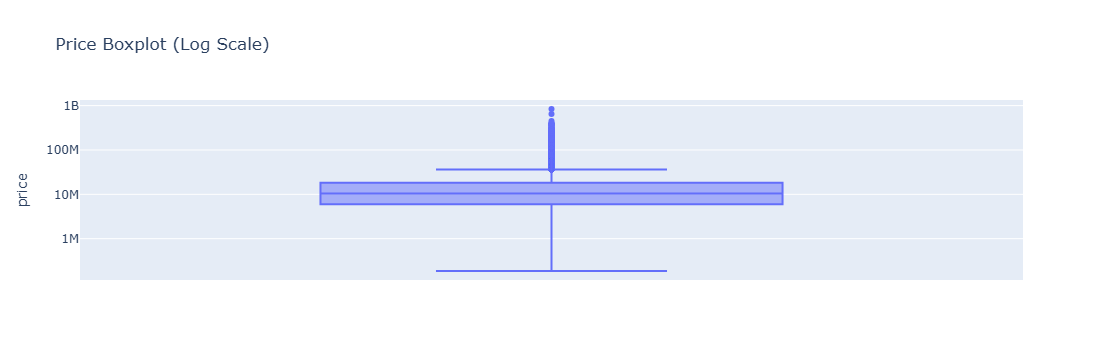

In [103]:
fig0 = px.box(df, y="price", title="price Boxplot")
fig0.show()

fig1 = px.box(df, y="price", title="Price Boxplot (Log Scale)")
fig1.update_yaxes(type="log")
fig1.show()


In [104]:
df_filtered = df[df["price"] < df["price"].quantile(0.99)]

fig2 = px.box(df_filtered, y="price", title="Price Boxplot Without Outliers")
fig2.show()

#### Price Vs city


###### 1 - Does city affect the price?

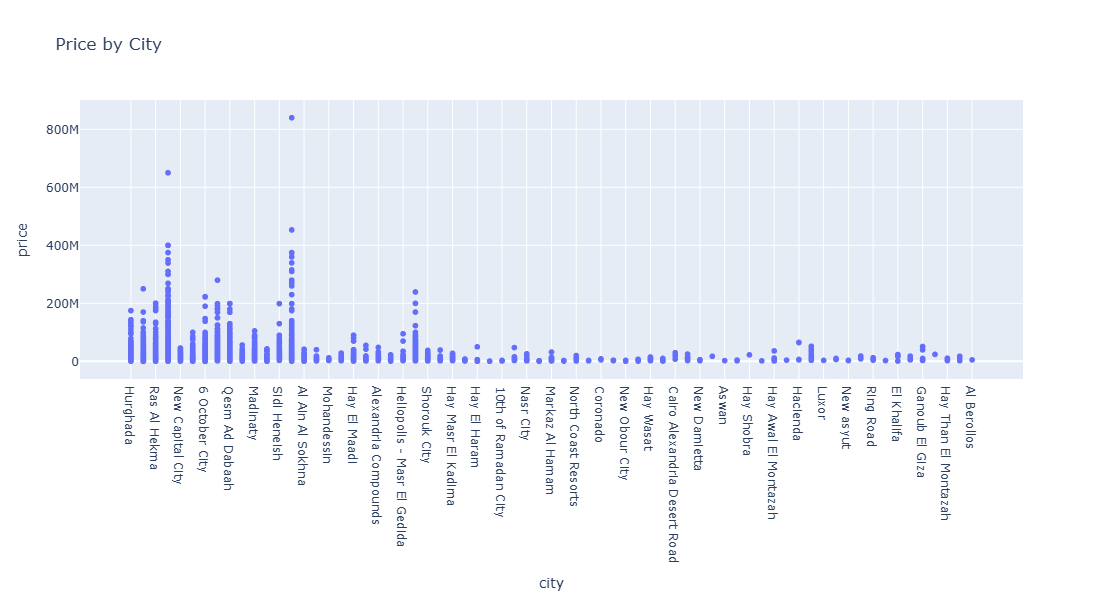

In [105]:
fig3 = px.scatter(df, x="city", y="price", title="Price by City", height=600, width=1000)
fig3.show()

#### price Vs location 

###### 2 - Does location affect the price?

In [106]:
fig4 = px.scatter(df , x ="location" , y="price", title="Price by location", height=600, width=1000)
fig4.show()

#### price Vs  size_sqm

###### 3 - Does size_sqm affect the price?

In [107]:
fig5 =px.scatter(df, x="size_sqm", y="price", title="Size_sqm vs Price")
fig5.show()

#### price Vs size_sqft

###### 4 - Does size_sqft affect the price?

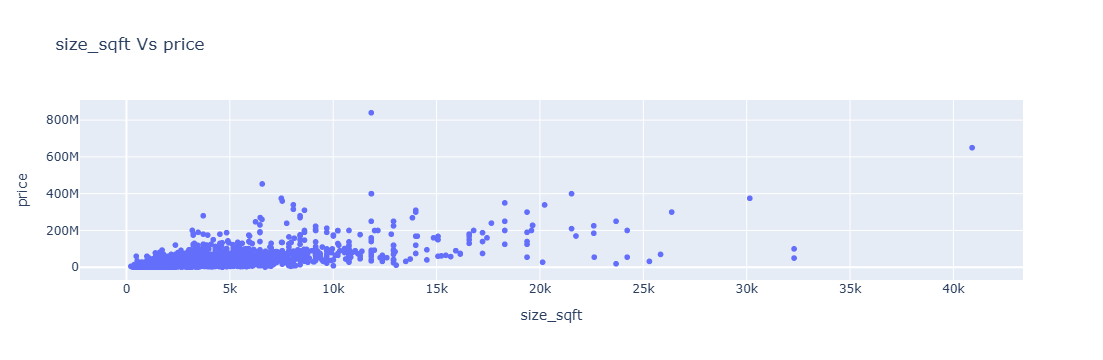

In [108]:
fig6 = px.scatter(df , x="size_sqft" , y= "price" , title= "size_sqft Vs price")
fig6.show()

#### price VS type 

###### 5 - Does type affect the price?

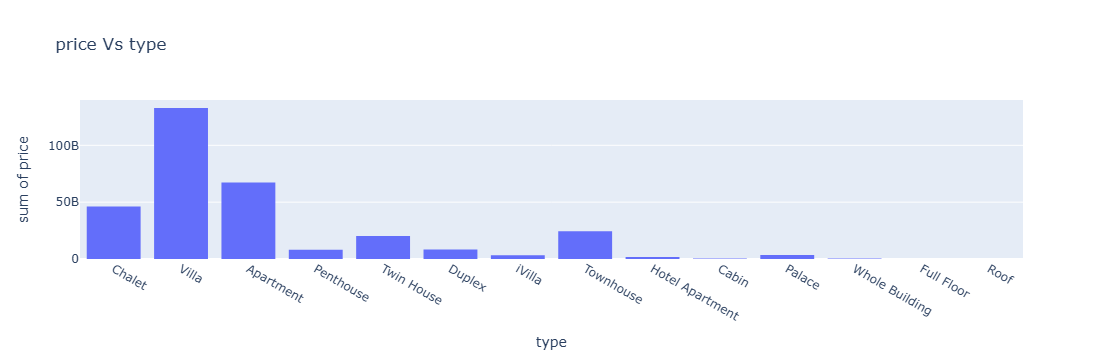

In [109]:
fig7 = px.histogram(df, x="type" , y= "price" , title= "price Vs type" ,  opacity = 1) 
fig7.show()

#### Price vs Bedrooms 

###### 6 - Does bedrooms affect the price?

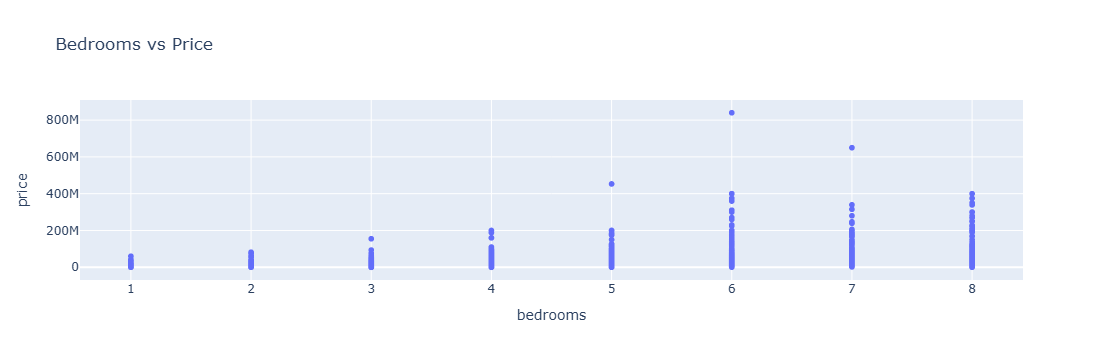

In [110]:
fig8 = px.scatter(df , x="bedrooms" , y = "price" , title= "Bedrooms vs Price")
fig8.show()

#### size_sqm Vs  size_sqft


###### 7 - is there is inconsistency between  size_sqm and  size_sqft?

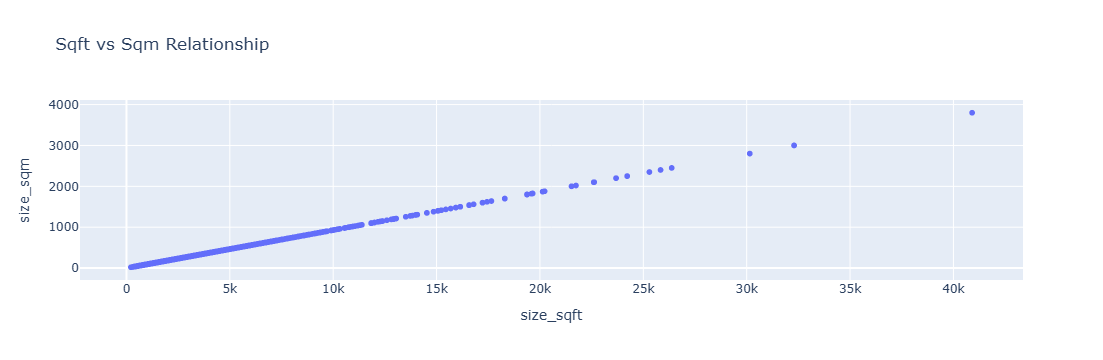

In [111]:
fig9 =px.scatter(df, x="size_sqft", y="size_sqm",title="Sqft vs Sqm Relationship")
fig9.show()

## Payment Method vs type

###### 8 - Does type affect the payment method ?

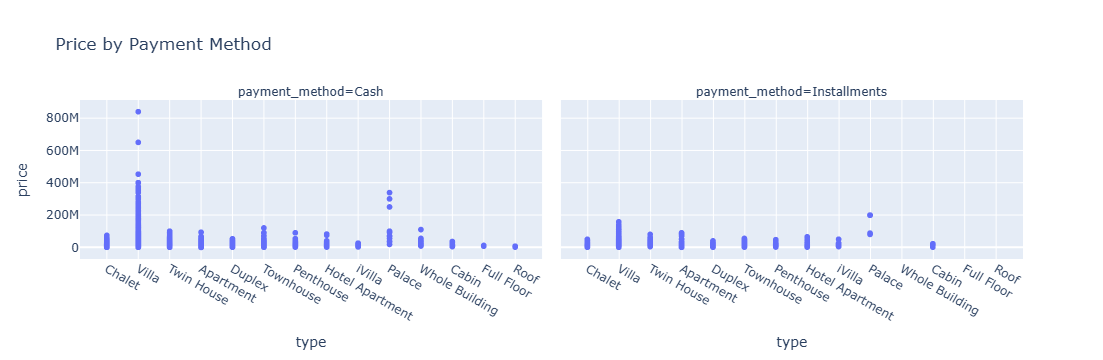

In [112]:
fig10 = px.scatter(df, x="type", y="price", facet_col= "payment_method", title="Price by Payment Method")
fig10.show()

## Multivariate Analysis

## 1- what is the average_price_per_city 

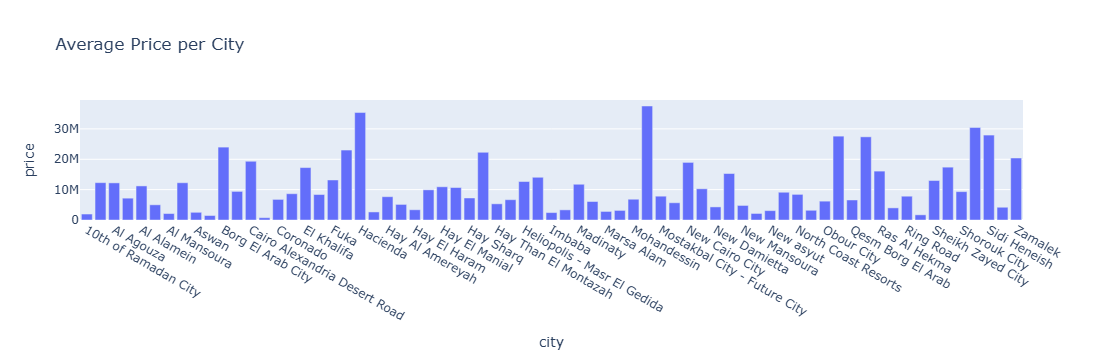

In [113]:
average_price_per_city = df.groupby("city")["price"].mean().reset_index()
fig11 = px.bar(average_price_per_city ,x="city", y="price", title="Average Price per City")
fig11.show()

### 2 - What is the distribution of average  price per month ?

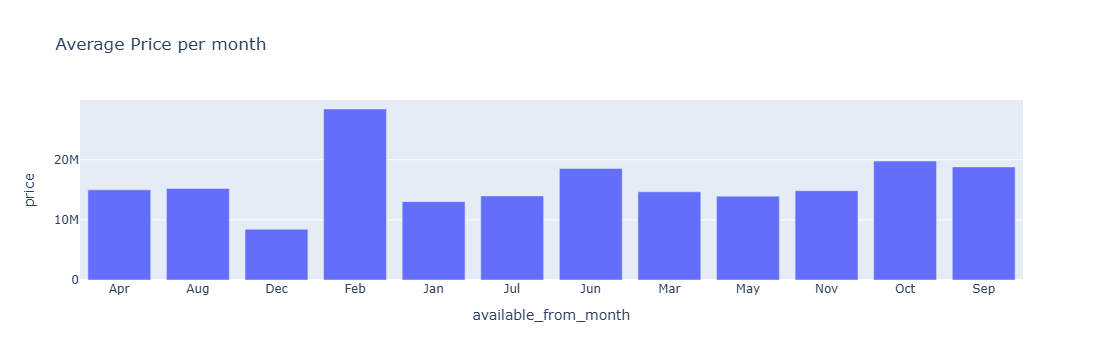

In [114]:
average_price_per_month = df.groupby("available_from_month")["price"].mean().reset_index()
fig12 = px.bar(average_price_per_month ,x="available_from_month", y="price", title="Average Price per month")
fig12.show()

### 3 - What is the corrolation between columns ?

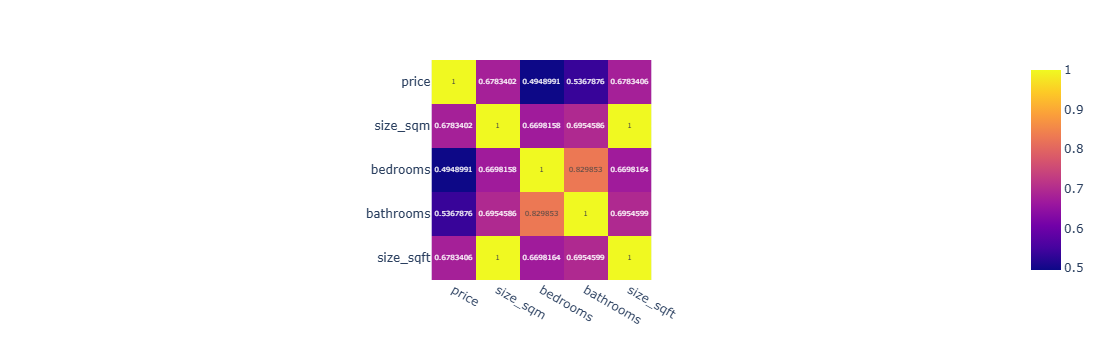

In [115]:
num_cols = ["price", "size_sqm", "bedrooms", "bathrooms", "size_sqft"]
corr = df[num_cols].corr()

fig13 = px.imshow(corr, text_auto=True)
fig13.show()

## 4- what is the total price per type per location ? 

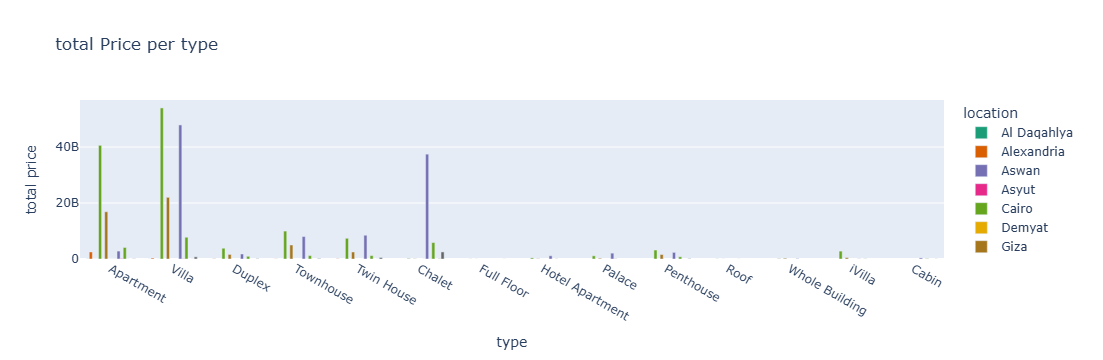

In [116]:
df_total_price_per_city_per_tyep = df.groupby(["location" , "type"])["price"].sum().reset_index()
fig14 = px.bar(
    df_total_price_per_city_per_tyep,
    x="type",
    y="price",
    color="location",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    barmode="group",
    title="total Price per type",
    hover_data=["type", "price"],
    labels={"type":"type" , "price":"total price"}
)
fig14.show()

## 5- what is the total type saled per location per city ?

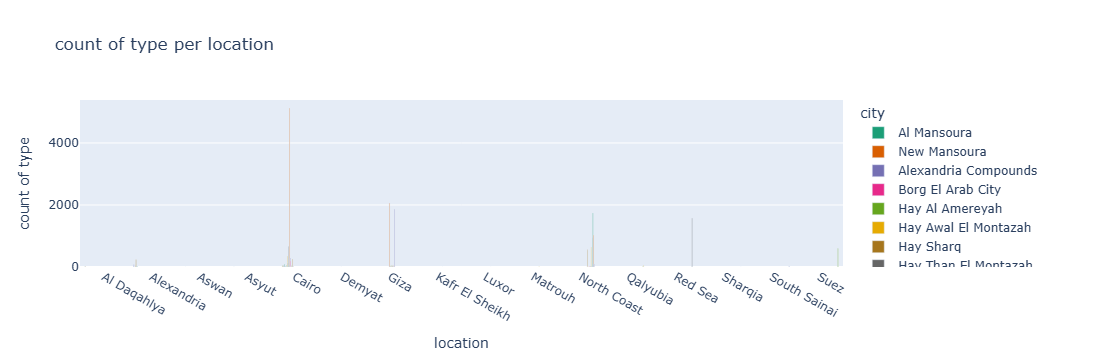

In [117]:
sales_per_location = df.groupby(["location" , "city"] )["type"].count().reset_index(name = "count of type")
fig15 = px.bar(
    sales_per_location,
    x="location",
    y="count of type",
    color = "city",
    color_discrete_sequence=px.colors.qualitative.Dark2,
    barmode="group",
    title="count of type per location  " , 
    labels= {"sum of count of type" : "count of type"}
)
fig15.show()

# Deployment 

In [118]:
import streamlit as st 

In [119]:
%%writefile egypt_real_estate_analysis.py 
import pandas as pd
import numpy as np 
import plotly.express as px 
import streamlit as st 

df=pd.read_csv("egypt_real_estate_listings.csv")
cleaned_df = pd.read_csv("cleaned_df.csv")


st.set_page_config(
    page_title="Egypt Real Estate Analysis",
    page_icon="🏠",
    layout="wide"
)


page = st.sidebar.radio('Pages', ['Intro','Data','Data after cleaning','Univariate Analysis', 'Bivariate Analysis','MultiVariate Analysis'])


if page == 'Intro':
    
    st.image("background.jpg", use_container_width=True)
    
    # عنوان ونص ترحيبي
    st.markdown("<h1 style='text-align: center; color: white;'>🏡 Welcome to Egypt Real Estate Analysis</h1>", unsafe_allow_html=True)
    st.markdown("""
    Welcome!  
    This web app helps you explore and analyze real estate data in Egypt.  
    You can view property prices, locations, types, and other features with interactive charts and tables.
    """)

elif page == 'Data' :
    st.markdown("<h1 style='text-align: center; color: white;'>This is the real Data before Cleaning : </h1>", unsafe_allow_html=True)
    st.markdown("[Visit Data ](https://www.kaggle.com/datasets/hassankhaled21/egyptian-real-estate-listings)")
    df

elif page == 'Data after cleaning' :
    st.markdown("<h1 style='text-align: center; color: white;'>This is Data after Cleaning : </h1>", unsafe_allow_html=True)
    cleaned_df

elif page == 'Univariate Analysis':
    st.header("📊 Univariate Analysis")
    for col in cleaned_df.columns:
        st.plotly_chart(px.histogram(data_frame= cleaned_df, x= col, title= col))
    

elif page == 'Bivariate Analysis':
    st.header("📈 Bivariate Analysis")

    
    st.markdown("<h1 style='text-align: center; color: white;'>Distribution for price : </h1>", unsafe_allow_html=True)
    st.plotly_chart(px.box(cleaned_df, y="price", title="price Boxplot"))


    
    fig1 = px.box(cleaned_df , y="price", title="Price Boxplot (Log Scale)")
    fig1.update_yaxes(type="log")
    st.plotly_chart(fig1)



    st.markdown("<h1 style='text-align: center; color: white;'>Price Vs city </h1>", unsafe_allow_html=True)
    fig3 = px.scatter(cleaned_df, x="city", y="price", title="Price by City", height=600, width=1000)
    st.plotly_chart(fig3)
    

    st.markdown("<h1 style='text-align: center; color: white;'>price Vs location </h1>", unsafe_allow_html=True)
    fig4 = px.scatter(cleaned_df , x ="location" , y="price", title="Price by location", height=600, width=1000)
    st.plotly_chart(fig4)


    st.markdown("<h1 style='text-align: center; color: white;'>price Vs  size_sqm</h1>", unsafe_allow_html=True)
    fig5 =px.scatter(cleaned_df, x="size_sqm", y="price", title="Size_sqm vs Price")
    st.plotly_chart(fig5)

    
    st.markdown("<h1 style='text-align: center; color: white;'>price VS type</h1>", unsafe_allow_html=True)
    fig7 = px.histogram(cleaned_df, x="type" , y= "price" , title= "price Vs type" ,  opacity = 1)
    st.plotly_chart(fig7)




    
    st.markdown("<h1 style='text-align: center; color: white;'>Price vs Bedrooms</h1>", unsafe_allow_html=True)
    fig8 = px.scatter(cleaned_df , x="bedrooms" , y = "price" , title= "Bedrooms vs Price")
    st.plotly_chart(fig8)



    
    st.markdown("<h1 style='text-align: center; color: white;'>inconsistency between  size_sqm and  size_sqft</h1>", unsafe_allow_html=True)
    fig9 =px.scatter(cleaned_df, x="size_sqft", y="size_sqm",title="Sqft vs Sqm Relationship")
    st.plotly_chart(fig9)
    
    st.markdown("<h1 style='text-align: center; color: white;'>Payment Method vs type</h1>", unsafe_allow_html=True)
    fig10 = px.scatter(cleaned_df, x="type", y="price", facet_col= "payment_method", title="Price by Payment Method")
    st.plotly_chart(fig10)



    
elif page == 'MultiVariate Analysis':
    st.header("🔍 MultiVariate Analysis")

    
    st.markdown("<h1 style='text-align: center; color: white;'>average_price_per_city</h1>", unsafe_allow_html=True)
    average_price_per_city = cleaned_df.groupby("city")["price"].mean().reset_index()
    fig10 = px.bar(average_price_per_city ,x="city", y="price", title="Average Price per City")
    st.plotly_chart(fig10)   

    st.markdown("<h1 style='text-align: center; color: white;'>average_price_per_month</h1>", unsafe_allow_html=True)
    average_price_per_month = cleaned_df.groupby("available_from_month")["price"].mean().reset_index()
    fig11 = px.bar(average_price_per_month ,x="available_from_month", y="price", title="Average Price per month")
    st.plotly_chart(fig11) 


    st.markdown("<h1 style='text-align: center; color: white;'>corrolation between columns</h1>", unsafe_allow_html=True)
    num_cols = ["price", "size_sqm", "bedrooms", "bathrooms", "size_sqft"]
    corr = cleaned_df[num_cols].corr()
    fig12 = px.imshow(corr, text_auto=True)
    st.plotly_chart(fig12)


    st.markdown("<h1 style='text-align: center; color: white;'>total price per type per location </h1>", unsafe_allow_html=True)
    df_total_price_per_city_per_tyep = cleaned_df.groupby(["location" , "type"])["price"].sum().reset_index()
    fig13 = px.bar( df_total_price_per_city_per_tyep,x="type",y="price",
                    color="location",
                    color_discrete_sequence=px.colors.qualitative.Dark2,barmode="group",
                    title="total Price per type",hover_data=["type", "price"],
                    labels={"type":"type" , "price":"total price"}
                    )
    st.plotly_chart(fig13)
    st.markdown("<h1 style='text-align: center; color: white;'>total type saled per location per city</h1>", unsafe_allow_html=True)
    sales_per_location = cleaned_df.groupby(["location" , "city"] )["type"].count().reset_index(name = "count of type")
    fig14 = px.bar(
                    sales_per_location,
                    x="location",
                    y="count of type",
                    color = "city",
                    color_discrete_sequence=px.colors.qualitative.Dark2,
                    barmode="group",
                    title="count of type per location  " , 
                    labels= {"sum of count of type" : "count of type"}
                    )
    st.plotly_chart(fig14)

Overwriting egypt_real_estate_analysis.py


In [120]:
! streamlit run egypt_real_estate_analysis.py 

^C


In [124]:
import pipreqs
! pipreqs

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in E:\DSDeploma\mid project\requirements.txt
